# Simple Neural Networks with Keras

This quick tutorial is meant to facilitate a discussion on Neural Networks and how to build them with Keras. It is not a complete introduction to NNs, but does provide a little background to get you started.  If there are any questions please contact John C.

## What is a Neural Network?

A neural network is biologically-inspired machine learning technique that approximates a function that maps a set of inputs to a set of outputs.  These outputs can be a single node or multiple output nodes, is normallt a real number signifying a real answer (regression) or a probability for class (classification). 

![A basic neural network](neural_net2.jpeg)


Each line above is a connection between neurons that has a 'weight' associated with it.  Each circle here is a 'neuron' which does the following two things:

* It sums all the inputs to the neuron
* It applies an 'activation' function to the resulting sum and produces the output. 

The number of input nodes and output nodes is defined by the dataset you're using and are self explanitory.  They are normally real numbers between 0 and 1.0. However, the choice of the number of hidden nodes in each layer, the type of layer, the number of 'hidden' layers between the input and output nodes are all left to the creater of the neural network.  Note: there are more complex nodes, especially ones with memory that are used in sequence learning, but that's another tutorial. 

A dataset is chosen, and its inputs need to be encoded to a set of vectors of real numbers (normally scaled to between 0.0 and 1.0).  The inputs are set to the input nodes.  At the beginning, the edge weights of the network are initialized randomly using a uniform distribution around 0.  Then the output of each neuron is multipled by the weight of the edge of the next neuron it's connected to, and that value is summed with the other inputs to the new neuron, an activation function is applied, and the resulting output is feed into the next neuron in the network. This is called a feed forward network.  The final result in the output nodes is compared to the real output from the dataset, and a process called *back propogation* is applied which pushes the error (how far off you were from the desired output) is used to update the weights of every connection in the network.  As multiple training data is used in the network, the weights are updated so that each net input will (hopefully) get closer and closer to the real answer. 

This is an example of *supervised* learning, where you have a training set with known answers. There are also ways to use neural networks for *unsupervised* learning, where just the inputs are given and the network tried to extract important features from the data automatically. Unsupervised learning isn't covered in this tutorial. 

It is important to note that the *only* values updated on a network are the weights associated with network edges.  Learning the proper weights will improve the accuracy of the network.  The more training data the network sees, the more likely the weigthts will be set to accurately predict new, unseen inputs in the future. 

### Math (a very little)

![Neurons and Activations](perceptron_activation.png)

An instance of input data is converted into a vector of floating point numbers and set to the input node. 


## Keras

This tutorial will show you how to run Keras and how to train some simple  neural networks. These can be useful for modeling, classifying, and predicting the results of a set of inputs. Keras is a lightweight simplified frontend to either Tensorflow, ONTK, MxNet, or Theano (now obsolete).  We'll use Tensorflow as our backend, as it's a bit more mature and easier to setup. 

### Getting / Installing

Keras (and Tensorflow) are available in pip, the python package manager. I'm using python3 here but they also work with python 2.  I did the following to set things up on a fairly standard debian stable system.  Some of these dependencies are for running 'jupyter', this nice(ish) web frontend for python code. 

    $ sudo apt-get install ipython3 python3-pip libopenblas-dev gfortran build-essential libzmq-dev graphviz 
    
This install ipython3 (a nice(ish) CLI for python3), the python3 package manager ('pip3'), a decently optimized BLAS library, and the fortran compiler.  build-essential is just basic build tools like gcc and make if you don't have them installed already.  libzmq-dev is only needed for jupyter. Next we'll install python packages into your local user directory:

    $ pip3 install --user --upgrade keras tensorflow graphviz pydot numpy jupyter
    
This will install Keras, Tensorflow, and their dependencies (some of which have to be specified manually). `jupyter` is just a web frontend and not necessary.  As part of this install, numpy and scipy will be compiled, which are the core linear algebra python libraries. 

With these you should have keras installed. Any binaries installed by these packages are located in `~/.local/bin`, so I add that to my PATH, but it may not be strictly necessary. 

### Configuring

Keras should now use Tensorflow by default.  If you want to use another backend, you'll need to adjust the config files in your home directory, specifically `.keras/keras.json`.  See https://keras.io/backend/ .

# Solving Binary XOR

In this example, we'll create an database to solve the XOR equation.  This is /really/ basic NN 101. However, it is illustrative of just how easy it is to set up neural networks in Keras

## Generating a dataset

We'll need several thousand instances of XOR to train our network.  In this case we know that XOR takes 2 binary inputs and output a single binary output which is the XOR of the two inputs.  So lets first generate a dataset with 1000 examples of this:

In [1]:
import numpy as np
import pickle
import random

input_space = [0.0, 1.0]
X_list = []
Y_list = []
for i in range(1000):
    X_list.append([random.choice(input_space), random.choice(input_space)])
    Y_list.append(bool(X_list[-1][0]) ^ bool(X_list[-1][1]))
    
X = np.array(X_list)
Y = np.array(Y_list)

# Check that I haven't done anything stupid.. 
for i in range(10):
    print("%f XOR %f = %f" % (X[i][0], X[i][1], Y[i]))

0.000000 XOR 1.000000 = 1.000000
0.000000 XOR 1.000000 = 1.000000
0.000000 XOR 1.000000 = 1.000000
0.000000 XOR 1.000000 = 1.000000
1.000000 XOR 0.000000 = 1.000000
1.000000 XOR 0.000000 = 1.000000
1.000000 XOR 0.000000 = 1.000000
1.000000 XOR 1.000000 = 0.000000
0.000000 XOR 1.000000 = 1.000000
0.000000 XOR 0.000000 = 0.000000


In [2]:
X.shape

(1000, 2)

In [3]:
Y.shape

(1000,)

### Building the Neural Network 

Great, we now have a dataset that captures the XOR operation. Lets use Keras to build a simple small neural network to solve this problem for us:

In [4]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [5]:
model = Sequential()
model.add(Dense(X.shape[1], input_shape=(X.shape[1],), activation='tanh')) # Input layer
model.add(Dense(4, activation='tanh'))                                     # hidden layer 1
model.add(Dense(4, activation='tanh'))                                     # hidden layer 2 (overkill but for demo purposes..)
model.add(Dense(1, activation='sigmoid'))                                  # Output layer 
model.compile(loss='mse',optimizer='sgd')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 43
Trainable params: 43
Non-trainable params: 0
_________________________________________________________________


Awesome! we now have a full densly connected netural network with two hidden layers ready to be trained.

### Training

In [7]:
hist = model.fit(X, Y, batch_size=1, epochs=20, validation_split=0.10, verbose=1)

Train on 900 samples, validate on 100 samples
Epoch 1/20
900/900 [==============================] - 1s 2ms/step - loss: 0.2528 - val_loss: 0.2277
Epoch 2/20
900/900 [==============================] - 1s 1ms/step - loss: 0.2150 - val_loss: 0.1868
Epoch 3/20
900/900 [==============================] - 1s 1ms/step - loss: 0.1843 - val_loss: 0.1610
Epoch 4/20
900/900 [==============================] - 1s 1ms/step - loss: 0.1670 - val_loss: 0.1483
Epoch 5/20
900/900 [==============================] - 1s 1ms/step - loss: 0.1505 - val_loss: 0.1285
Epoch 6/20
900/900 [==============================] - 1s 1ms/step - loss: 0.1191 - val_loss: 0.0871
Epoch 7/20
900/900 [==============================] - 1s 1ms/step - loss: 0.0683 - val_loss: 0.0453
Epoch 8/20
900/900 [==============================] - 1s 1ms/step - loss: 0.0356 - val_loss: 0.0251
Epoch 9/20
900/900 [==============================] - 1s 1ms/step - loss: 0.0206 - val_loss: 0.0157
Epoch 10/20
900/900 [==============================] -

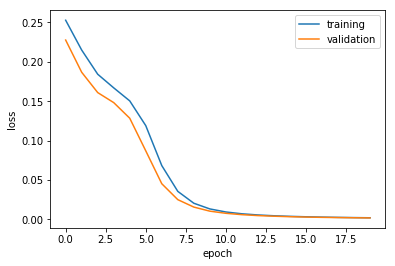

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.subplot(111)
plt.plot(hist.history['loss'], label='training')
plt.plot(hist.history['val_loss'], label='validation')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.show()

In [9]:
model.predict(np.array([[0.0, 1.0]]))

array([[0.96003544]], dtype=float32)

In [10]:
model.predict(np.array([[1.0, 1.0]]))

array([[0.06157615]], dtype=float32)

In [11]:
model.predict(np.array([[0.0, 0.0]]))

array([[0.03363206]], dtype=float32)

In [12]:
model.predict(np.array([[1.0, 0.0]]))

array([[0.9597021]], dtype=float32)

# Conclusion

As we can see, the network was able to model the XOR function accurately with ver little training time.  The main takaways with this tutorial are:

* Using Keras, one can build, train, and evaluate complex neural networks in ~10 lines of Python code
* Neural networks can be applicable to any problem where you can express a set of inputs as a vector of real numbers.
